# AlexNet CNN Description

As Described in: https://dl.acm.org/action/showLogin?redirectUri=https%3A%2F%2Fdl.acm.org%2Fdoi%2F10.1145%2F3065386

In [1]:
# Imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

/Users/danielmakin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Libraries imported.


In [2]:
# Read all of the Necessary Images and add Labels

import os
from PIL import Image
import numpy as np
# Load the iCub Dataset
def load_images_from_folder():
    X = []
    y = []
    for i, f in enumerate(['book', 'cellphone', 'hairbrush', 'hairclip', 'mouse', 'pencilcase', 'perfume', 'ringbinder', 'sunglasses', 'wallet']):
        # Iterate through all files in the folder
        for filename in os.listdir(os.path.join('selected_images/', f)):
            # Check if the file is an image (you may want to add more file extensions)
            if filename.endswith((".jpg")):
                # Build the full path of the image file
                file_path = os.path.join(os.path.join('selected_images/', f), filename)
                # Open the image file
                img = Image.open(file_path)
                # Downsize the Images
                img = img.resize((32, 32))
                # Convert the image to a NumPy array
                img_array = np.array(img)
                X.append(img_array)
                y.append(i)
    return np.array(X), np.array(y)

X, y = load_images_from_folder()
print("Data Downloaded")

Data Downloaded


In [3]:
# Data Split 80:20
from sklearn.model_selection import train_test_split

# Get the Seperate Sets of Data
input_X_train, input_X_test, output_y_train, output_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# Tell the model there are 10 classes
output_Y_train = utils.to_categorical(output_y_train, 10)
output_Y_test = utils.to_categorical(output_y_test, 10) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (21362, 32, 32, 3)
21362 train samples
5341 test samples


In [4]:
model = Sequential()
# Convolutional Layer 1
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

# Convolutional Layer 2
model.add(Conv2D(filters=192, kernel_size=(3,3), strides = (1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Convolutional Layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides = (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())

# Convolutional Layer 4
model.add(Conv2D(filters=256, kernel_size=(3,3), strides = (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())

# Convolutional Layer 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides = (1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

# Flatten the CNN output
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 192)       110784    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 192)         0         
 g2D)                                                            
                                                        

In [6]:
# Train the Model
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
134/134 [==============================] - 108s 800ms/step - loss: 2.4741 - accuracy: 0.3882 - val_loss: 3.7499 - val_accuracy: 0.1411
Epoch 2/20
134/134 [==============================] - 121s 902ms/step - loss: 0.9605 - accuracy: 0.6786 - val_loss: 7.9860 - val_accuracy: 0.1051
Epoch 3/20
134/134 [==============================] - 114s 850ms/step - loss: 0.6313 - accuracy: 0.7989 - val_loss: 12.7528 - val_accuracy: 0.1243
Epoch 4/20
134/134 [==============================] - 121s 900ms/step - loss: 0.4975 - accuracy: 0.8485 - val_loss: 5.3953 - val_accuracy: 0.2977
Epoch 5/20
134/134 [==============================] - 118s 884ms/step - loss: 0.4143 - accuracy: 0.8834 - val_loss: 1.2431 - val_accuracy: 0.7222
Epoch 6/20
134/134 [==============================] - 129s 967ms/step - loss: 0.3546 - accuracy: 0.9027 - val_loss: 0.6688 - val_accuracy: 0.8402
Epoch 7/20
134/134 [==============================] - 122s 908ms/step - loss: 0.3231 - accuracy: 0.9119 - val_loss: 11.3828

42/42 [==============================] - 7s 155ms/step - loss: 0.4327 - accuracy: 0.9395

Test score/loss: 0.43268439173698425
Test accuracy: 0.9395244121551514
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


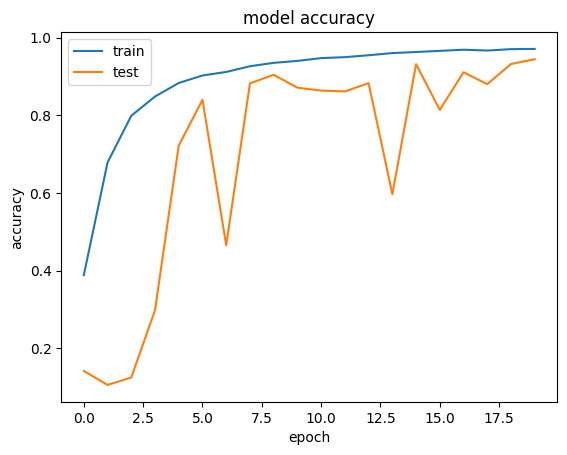

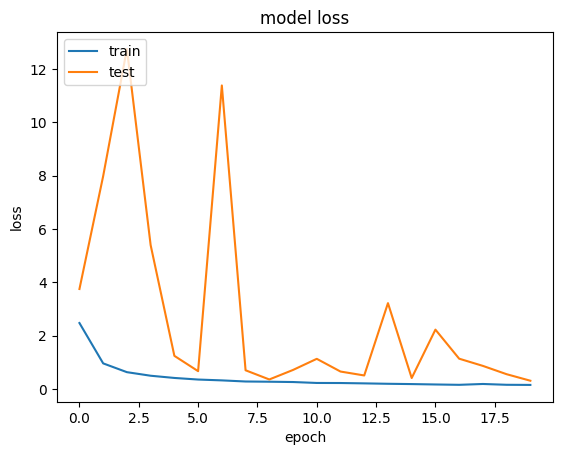

In [8]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
history = model.fit(input_X_train, output_Y_train, batch_size=512, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/20
30/34 [=========================>....] - ETA: 9s - loss: 0.0572 - accuracy: 0.9868 

KeyboardInterrupt: 